In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import torch
import torchvision
from collections import Counter

from data_utils import np_loader
from data_plotting import plot3d_interactive, plot_projection, plot_all_projections, rotate_data_non_minkowski
import os

In [2]:
data_directory = "../../PilarDataTrain"

[[3.920e+02 7.600e+01 3.110e+02 1.398e-02]
 [3.910e+02 6.200e+01 3.130e+02 1.199e-02]
 [3.900e+02 6.200e+01 3.140e+02 1.112e-02]
 ...
 [4.730e+02 1.560e+02 5.110e+02 1.093e-02]
 [4.740e+02 1.560e+02 5.110e+02 4.898e-02]
 [4.750e+02 1.560e+02 5.110e+02 1.093e-02]]
(5864, 4)
torch.Size([1, 5864, 4])


0

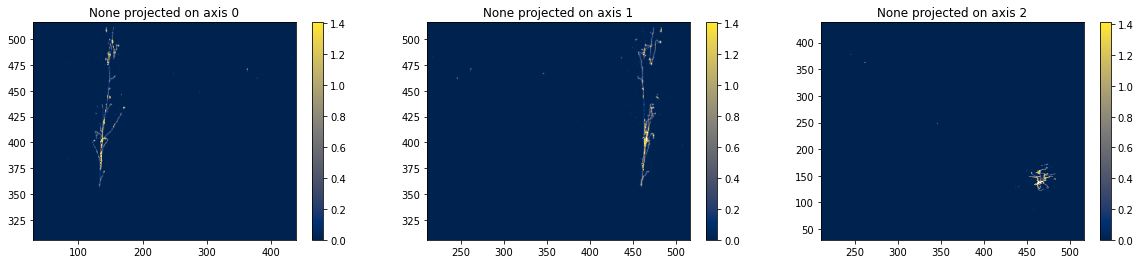

In [26]:
example = np_loader(data_directory+"/Electron/000005.npy")
print(example)
print(example.shape)
example_unsqueeze = torch.unsqueeze(torch.from_numpy(example), dim=0)
print(example_unsqueeze.shape)

plot_all_projections(example_unsqueeze, label=None, offset = 5, save = False)

#"/Electron/000005.npy"
#"/Gamma/000004.npy"
#"/Proton/000007.npy"
#"/Muon/000001.npy"

In [29]:

for i in range(4):
    num_correct_class = (torch.argmax(pred.F, dim=-1)[labels == i] == labels[labels == i]).float().sum().item()
    num_class_labels = len(labels[labels == i])
    print(f"{num_correct_class=}, {num_class_labels=}")
    per_class_accuracy.append(num_correct_class / num_class_labels)
    # calculate confusion matrix

diameter = 3
steps = [1.0, 1.0, 1.0]
import math

In [8]:
from e3nn import o3
from e3nn.nn import FullyConnectedNet, Gate
from e3nn.o3 import FullyConnectedTensorProduct
from e3nn.math import soft_one_hot_linspace
from e3nn.util.test import assert_equivariant
import torch

In [62]:
irreps_mid = o3.Irreps("32x0e + 6x1e + 6x1o + 2x2e + 2x2o")

irreps_non_scalars = irreps_mid[1:]

act = torch.nn.LeakyReLU()

print(irreps_scalars)
print(irreps_non_scalars)

num_irreps_scalars = irreps_mid[:1].num_irreps
num_irreps = irreps_non_scalars.num_irreps
print(num_irreps)
irreps_gate = o3.Irreps(f"{num_irreps}x0e")
print(irreps_gate.num_irreps, irreps_gate.dim)

irreps_scalars = o3.Irreps(f"{num_irreps_scalars-num_irreps}x0e")

gate = Gate(irreps_scalars, [act], irreps_gate, [act], irreps_non_scalars)
print(gate)
print((irreps_mid+irreps_mid).simplify())

16x0e
6x1e+6x1o+2x2e+2x2o
16
16 16
Gate (32x0e+6x1o+6x1e+2x2o+2x2e -> 16x0e+6x1e+6x1o+2x2e+2x2o)
32x0e+6x1e+6x1o+2x2e+2x2o+32x0e+6x1e+6x1o+2x2e+2x2o


In [11]:
gate = Gate(
            "16x0e + 16x0o", [torch.relu, torch.abs],  # scalar
            "8x0e + 8x0o + 8x0e + 8x0o", [torch.relu, torch.tanh, torch.relu, torch.tanh],  # gates (scalars)
            "16x1o + 16x1e"  # gated tensors, num_irreps has to match with gates
        )
print(gate)

Gate (32x0o+32x0e+16x1o+16x1e -> 16x0e+16x0e+8x1o+8x1e+8x1e+8x1o)


In [30]:
r = diameter / 2

s = math.floor(r / steps[0])
x = torch.arange(-s, s + 1.0) * steps[0]

s = math.floor(r / steps[1])
y = torch.arange(-s, s + 1.0) * steps[1]

s = math.floor(r / steps[2])
z = torch.arange(-s, s + 1.0) * steps[2]

print(x)

tensor([-1.,  0.,  1.])


In [5]:
data = torchvision.datasets.DatasetFolder(root=data_directory, loader=np_loader, extensions='.npy')

In [6]:
classes = data.classes
count = Counter(data.targets)
print({classes[k]:v for k,v in count.items()})

{'Electron': 358155, 'Gamma': 198648, 'Muon': 214936, 'Pion': 81568, 'Proton': 287824}


In [7]:
idx_to_class = {v: k for k, v in data.class_to_idx.items()}

In [8]:
test_loader = torch.utils.data.DataLoader(
        dataset=data,
        batch_size=1,
        shuffle=True)

In [9]:
test_loader.dataset

Dataset DatasetFolder
    Number of datapoints: 1141131
    Root location: ../../PilarDataTrain

In [20]:
it = iter(test_loader)

In [41]:
next_data, class_label = next(it)
label = idx_to_class[int(class_label[0])]

In [42]:
print(next_data.shape)
print(label)

torch.Size([1, 6911, 4])
Gamma


0

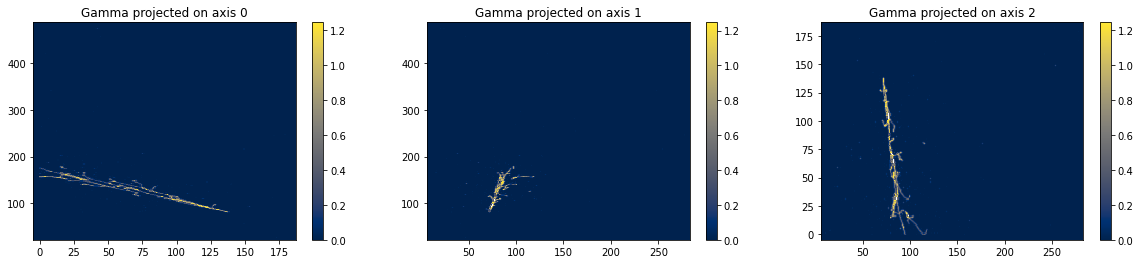

In [43]:
plot_all_projections(next_data, label, offset = 5, save = False)

(6911, 3)
[-20.0, 202.0] [7.0, 502.0]


0

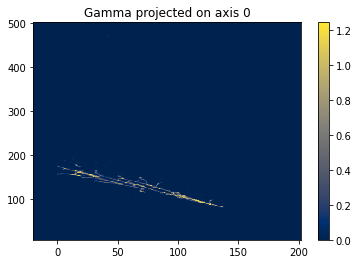

In [44]:
plot_projection(next_data, label, projection_axis=0)

In [15]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime

In [155]:
def plot3d_interactive(data, label=None, tight_range=False, set_range = None, colorbar=True, show_ticks = True, show_grid = True, nticks = 5, offset=15, show_fig=True, save=False, save_loc = None, gif_index = None):
    """
        Args:
            data: data in the form of a numpy array [x, y, z, charge] has dim [1, N, 4]
            label: label of data (for title)
            tight_range: if True, fit range when plotting to data
            rotation_range: if True, make range such that the axis go from -coord_max to coord_max
            colorbar: if True, show colorbar
            show_ticks: if True, show ticks
            show_grid: if True, show grid
            nticks: number of ticks
            offset: offset for normalization
            show_fig: if True, show plot
            save: if True, save plot
            save_loc: location to save plot inside plots folder
            gif_index: index of picture in gif

        Returns:
            0 if successful

        """

    pos3d = data[0][:, :-1].numpy()
    pos3d_x, pos3d_y, pos3d_z = pos3d.T

    charge = data[0][:, -1].numpy()

    if colorbar:
        colorbar = dict(
            title="Charge"
        )
    else:
        colorbar = dict(
            title=None
        )

    fig = go.Figure(data=[go.Scatter3d(
        x=pos3d_x,
        y=pos3d_y,
        z=pos3d_z,
        mode='markers',
        marker=dict(
            size=1,
            color=charge,  # set color to an array/list of desired values
            colorbar=colorbar,
            colorscale='Viridis',  # choose a colorscale
            opacity=0.9
        )
    )])
    camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.5, y=0.5, z=0.1)
    )
    range = [0, 512]
    scene = dict(aspectratio=dict(x=0.7, y=0.7, z=0.7),
                 xaxis = dict(range=range, nticks=nticks, showgrid = show_grid, showticklabels=show_ticks),
                 yaxis = dict(range=range, nticks=nticks, showgrid = show_grid, showticklabels=show_ticks),
                 zaxis = dict(range=range, nticks=nticks, showgrid = show_grid,showticklabels=show_ticks)
    )

    if set_range is not None:
        scene["xaxis"]["range"] = set_range
        scene["yaxis"]["range"] = set_range
        scene["zaxis"]["range"] = set_range
    # If normalize, get the corresponding range for data to fill range
    elif tight_range:
        min_pos = pos3d.min(axis=0)
        max_pos = pos3d.max(axis=0)
        range = np.vstack((min_pos, max_pos)).T
        range.T[0] -= offset
        range.T[1] += offset
        scene["xaxis"]["range"] = range[0]
        scene["yaxis"]["range"] = range[1]
        scene["zaxis"]["range"] = range[2]
    else:
        range = [0, 512]
        scene["xaxis"]["range"] = range
        scene["yaxis"]["range"] = range
        scene["zaxis"]["range"] = range

    fig.update_layout(
        title=label,
        scene_camera=camera,
        font=dict(
            size=13,
            color="Black"
        ),
        margin=dict(t=30, r=0, l=0, b=0),
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        scene=scene)

    if show_fig:
        fig.show()

    if save:
        if save_loc is None:
            now = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
            fig.write_image(f"../plots/{now}_3D{label}.png")
        else:
            if not os.path.exists(f"../plots/3D{label}_{save_loc}"):
                os.makedirs(f"../plots/3D{label}_{save_loc}")
            fig.write_image(f"../plots/3D{label}_{save_loc}{gif_index:05d}.png")
    return 0

In [125]:
next_data_clone = next_data.clone().type(torch.float32)
next_data_clone[0][:, :-1] -= next_data_clone[0][:, :-1].mean(axis=0)

In [173]:
angles = (1.0, 0, 0)
rotated_data = rotate_data_non_minkowski(next_data_clone, angles)
print(rotated_data)

tensor([[[-1.1184e+02,  1.1166e+02, -2.7495e+01,  3.4698e-02],
         [-8.9841e+01,  8.7661e+01, -6.2372e+00,  2.1790e-02],
         [-7.5066e+01,  5.6607e+00, -1.8142e+01,  3.8635e-02],
         ...,
         [ 2.5187e+02, -1.8339e+01,  2.3337e+02,  1.5915e-02],
         [ 2.5271e+02, -1.9339e+01,  2.3391e+02,  1.5915e-02],
         [ 2.5914e+02, -9.3393e+00,  2.3685e+02,  1.9730e-02]]])


In [174]:
plot3d_interactive(rotated_data, label, tight_range=False, set_range=range, colorbar=True, show_ticks=False, nticks = None, save=False, show_grid=False)

0

In [184]:
t = np.linspace(0, 1, 200)
n = 2 # number of rotations
phi = np.pi * t
theta = 2 * np.pi * n * t
zeros = np.zeros_like(t)
angles = np.stack((phi, theta, zeros), axis=1)

In [177]:
pos3d = next_data_clone[0][:, :-1].numpy()
norm = np.linalg.norm(pos3d, axis=1)
max_range = 0.6*np.max(norm)
range = [-max_range, max_range]

In [186]:
for i, abc in enumerate(angles):
    save_loc = "gif_4/"
    rotated_data = rotate_data_non_minkowski(next_data_clone, abc)
    print(f"Saving {i}/{len(angles)}\r", end="")
    # plot3d_interactive(rotated_data,
    #                    label=None,
    #                    tight_range=False,
    #                    set_range=range,
    #                    colorbar=False,
    #                    show_ticks=False,
    #                    nticks = None,
    #                    show_fig=False,
    #                    save=True,
    #                    show_grid=False,
    #                    save_loc=save_loc,
    #                    gif_index =i)

Saving 0/200
Saving 1/200
Saving 2/200
Saving 3/200
Saving 4/200
Saving 5/200
Saving 6/200
Saving 7/200
Saving 8/200
Saving 9/200
Saving 10/200
Saving 11/200
Saving 12/200
Saving 13/200
Saving 14/200
Saving 15/200
Saving 16/200
Saving 17/200
Saving 18/200
Saving 19/200
Saving 20/200
Saving 21/200
Saving 22/200
Saving 23/200
Saving 24/200
Saving 25/200
Saving 26/200
Saving 27/200
Saving 28/200
Saving 29/200
Saving 30/200
Saving 31/200
Saving 32/200
Saving 33/200
Saving 34/200
Saving 35/200
Saving 36/200
Saving 37/200
Saving 38/200
Saving 39/200
Saving 40/200
Saving 41/200
Saving 42/200
Saving 43/200
Saving 44/200
Saving 45/200
Saving 46/200
Saving 47/200
Saving 48/200
Saving 49/200
Saving 50/200
Saving 51/200
Saving 52/200
Saving 53/200
Saving 54/200
Saving 55/200
Saving 56/200
Saving 57/200
Saving 58/200
Saving 59/200
Saving 60/200
Saving 61/200
Saving 62/200
Saving 63/200
Saving 64/200
Saving 65/200
Saving 66/200
Saving 67/200
Saving 68/200
Saving 69/200
Saving 70/200
Saving 71/200
Sa

In [196]:
def gen_frame(path):
    im = Image.open(path)
    alpha = im.getchannel('A')

    # Convert the image into P mode but only use 255 colors in the palette out of 256
    im = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=255)

    # Set all pixel values below 128 to 255 , and the rest to 0
    mask = Image.eval(alpha, lambda a: 255 if a <=128 else 0)

    # Paste the color of index 255 and use alpha as a mask
    im.paste(255, mask)

    # The transparency index is 255
    im.info['transparency'] = 255

    return im


In [197]:
import os
from PIL import Image

png_dir = '../plots/3DNone_gif_4'
images = []
for file_name in sorted(os.listdir(png_dir)):
    print(file_name)
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(gen_frame(file_path))

00000.png
00001.png
00002.png
00003.png
00004.png
00005.png
00006.png
00007.png
00008.png
00009.png
00010.png
00011.png
00012.png
00013.png
00014.png
00015.png
00016.png
00017.png
00018.png
00019.png
00020.png
00021.png
00022.png
00023.png
00024.png
00025.png
00026.png
00027.png
00028.png
00029.png
00030.png
00031.png
00032.png
00033.png
00034.png
00035.png
00036.png
00037.png
00038.png
00039.png
00040.png
00041.png
00042.png
00043.png
00044.png
00045.png
00046.png
00047.png
00048.png
00049.png
00050.png
00051.png
00052.png
00053.png
00054.png
00055.png
00056.png
00057.png
00058.png
00059.png
00060.png
00061.png
00062.png
00063.png
00064.png
00065.png
00066.png
00067.png
00068.png
00069.png
00070.png
00071.png
00072.png
00073.png
00074.png
00075.png
00076.png
00077.png
00078.png
00079.png
00080.png
00081.png
00082.png
00083.png
00084.png
00085.png
00086.png
00087.png
00088.png
00089.png
00090.png
00091.png
00092.png
00093.png
00094.png
00095.png
00096.png
00097.png
00098.png
00099.png


In [214]:
gif_save_loc = "../plots/gifs/3DGamma22.gif"
images[0].save(gif_save_loc, save_all=True, append_images=images[1:], optimize=True, duration=100, loop=0, disposal=0, scale=4)